In [55]:
# Src: https://github.com/jvns/pandas-cookbook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.style.use('ggplot') # New way ^
plt.rcParams['figure.figsize'] = (15, 5)

In [33]:
url = "https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv"
df = pd.read_csv(url, encoding='latin1', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')
df[:3]

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01       35                                NaN                      0   
2012-01-02       83                                NaN                      1   
2012-01-03      135                                NaN                      2   

            Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Date                                                                       
2012-01-01             38             51       26            10       16   
2012-01-02             68            153       53             6       43   
2012-01-03            104            248       89             3       58   

            St-Urbain (données non disponibles)  
Date                                             
2012-01-01                                  NaN  
2012-01-02                                  NaN  
2012-01-03                                  NaN

In [35]:
df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

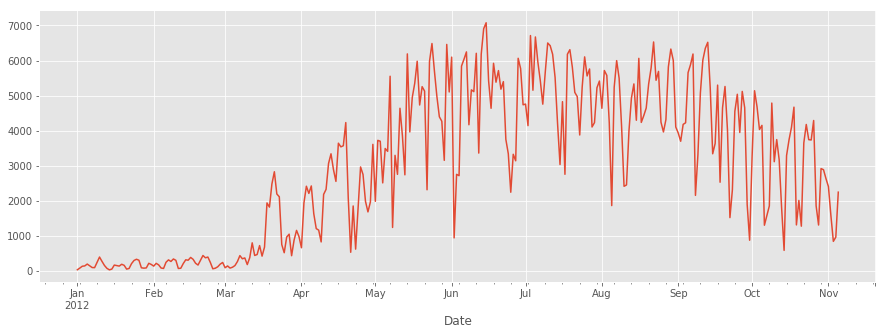

In [50]:
df['Berri 1'].plot()

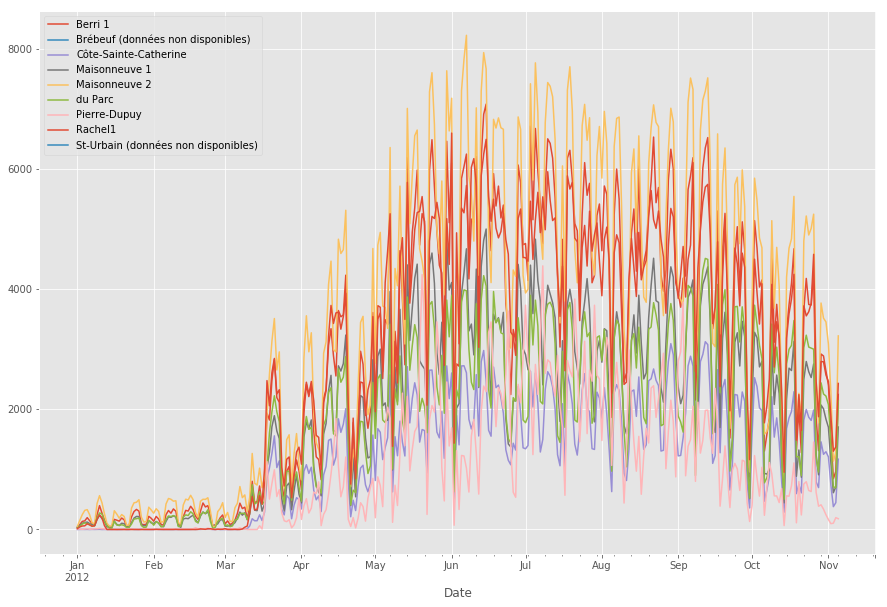

In [57]:
df.plot(figsize=(15,10))

In [76]:
berri_bikes = df[['Berri 1']].copy() # Copy to make another dataframe?
berri_bikes[:5]

Berri 1
Date               
2012-01-01       35
2012-01-02       83
2012-01-03      135
2012-01-04      144
2012-01-05      197

In [77]:
# Index - is what's on the left above
berri_bikes.index
# Some days are missing - only 310 here. 

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [78]:
# Get day of the month for each row - timeseries pandas functionality
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

In [79]:
berri_bikes.index.weekday # 0 is Monday here

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [80]:
# Add the weekday as a column!
    berri_bikes.loc[:, 'weekday'] = berri_bikes.index.weekday

In [83]:
berri_bikes[:5]

Berri 1  weekday
Date                        
2012-01-01       35        6
2012-01-02       83        0
2012-01-03      135        1
2012-01-04      144        2
2012-01-05      197        3

In [96]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

Berri 1
weekday         
0         134298
1         135305
2         152972
3         160131
4         141771
5         101578
6          99310

In [99]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

Berri 1
Monday      134298
Tuesday     135305
Wednesday   152972
Thursday    160131
Friday      141771
Saturday    101578
Sunday       99310

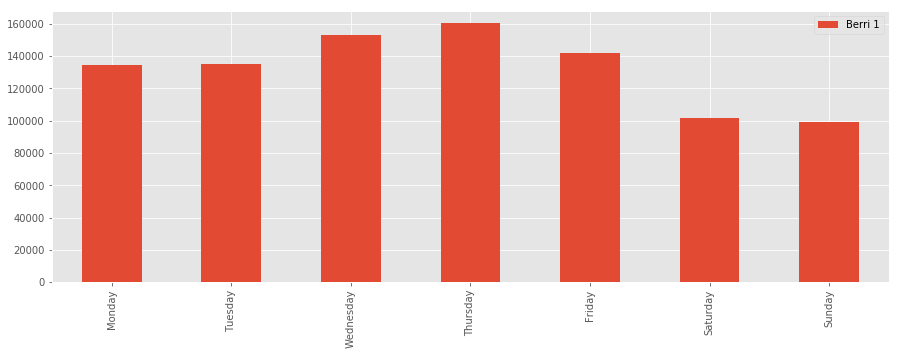

In [100]:
weekday_counts.plot(kind='bar')